<a href="https://colab.research.google.com/github/GuilhermeGwrAdm/Desafio_Telecom_Parte_2/blob/main/Telecom_parte_2_versao_2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/df_limpo.csv')
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,Total.Day,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,2.20,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,2.01,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,2.34,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,3.17,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,2.97,83.9,267.40


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer.gender            7043 non-null   object 
 3   customer.SeniorCitizen     7043 non-null   int64  
 4   customer.Partner           7043 non-null   object 
 5   customer.Dependents        7043 non-null   object 
 6   customer.tenure            7043 non-null   int64  
 7   phone.PhoneService         7043 non-null   object 
 8   phone.MultipleLines        7043 non-null   object 
 9   internet.InternetService   7043 non-null   object 
 10  internet.OnlineSecurity    7043 non-null   object 
 11  internet.OnlineBackup      7043 non-null   object 
 12  internet.DeviceProtection  7043 non-null   object 
 13  internet.TechSupport       7043 non-null   objec

FASE PREPARAÇÃO DADOS

RETIRADA DE INFORMAÇÕES IRRELEVANTES PARA O MODELO DE MACHINE LEARNING

In [19]:
df = df.drop(columns=['customerID'])


VERIFICAÇÃO VALORES NULOS

In [20]:
df.isnull().sum()


,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0
internet.OnlineSecurity,0


EXCLUSÃO VALORES NULOS

In [21]:
df = df.dropna(subset=['Total.Day', 'account.Charges.Total'])

VERIFICAÇÃO VALORES NULOS NOVAMENTE

In [22]:
df.isnull().sum()

,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0
internet.OnlineSecurity,0


VERIFICAÇÃO NÚMERO DE PARÂMETROS POR COLUNA

In [23]:
display(df.nunique())

,0
Churn,2
customer.gender,2
customer.SeniorCitizen,2
customer.Partner,2
customer.Dependents,2
customer.tenure,72
phone.PhoneService,2
phone.MultipleLines,3
internet.InternetService,3
internet.OnlineSecurity,3


IDENTIFICANDO OS DADOS CONTIDOS NA COLUNAS COM 3 PARÂMETROS

In [24]:
for column in df.columns:
    if df[column].nunique() == 3:
        print(f"Unique values for column '{column}': {df[column].unique()}")

Unique values for column 'phone.MultipleLines': ['No' 'Yes' 'No phone service']
Unique values for column 'internet.InternetService': ['DSL' 'Fiber optic' 'No']
Unique values for column 'internet.OnlineSecurity': ['No' 'Yes' 'No internet service']
Unique values for column 'internet.OnlineBackup': ['Yes' 'No' 'No internet service']
Unique values for column 'internet.DeviceProtection': ['No' 'Yes' 'No internet service']
Unique values for column 'internet.TechSupport': ['Yes' 'No' 'No internet service']
Unique values for column 'internet.StreamingTV': ['Yes' 'No' 'No internet service']
Unique values for column 'internet.StreamingMovies': ['No' 'Yes' 'No internet service']
Unique values for column 'account.Contract': ['One year' 'Month-to-month' 'Two year']


REDUÇÃO NÚMERO DE PARÂMETROS DAS COLUNAS COM  "No internet service"

In [25]:
df_clean = df.copy()

# === Etapa 1: Agrupar "No internet service" como "No"
cols_to_fix = [
    'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection',
    'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies'
]

for col in cols_to_fix:
    df_clean[col] = df_clean[col].replace('No internet service', 'No')

VERIFICAÇÃO NÚMERO DE PARÂMETROS POR COLUNA NOVAMENTE

In [27]:
display(df_clean.nunique())

,0
Churn,2
customer.gender,2
customer.SeniorCitizen,2
customer.Partner,2
customer.Dependents,2
customer.tenure,72
phone.PhoneService,2
phone.MultipleLines,3
internet.InternetService,3
internet.OnlineSecurity,2


SEPARAÇÃO VARIÁVEIS EXPLICATIVAS (X) E VARIÁVEIS ALVO (Y)

In [28]:
y = df_clean['Churn']
x = df_clean.drop(columns=['Churn'])

APLICAÇÃO ONE HOT ENCONDING NA VARIÁVEIS EXPLICATIVAS

In [35]:
colunas = x.columns
colunas

Index(['customer.gender', 'customer.SeniorCitizen', 'customer.Partner',
       'customer.Dependents', 'customer.tenure', 'phone.PhoneService',
       'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod', 'Total.Day',
       'account.Charges.Monthly', 'account.Charges.Total'],
      dtype='object')

In [36]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

APLICAÇÃO ENCONDING SEM MODIFICAR AS COLUNAS BINÁRIAS NAS VARIÁVEIS EXPLICATIVAS

In [38]:
one_hot = make_column_transformer((OneHotEncoder(drop='if_binary'), [
    'customer.gender', 'customer.Partner','customer.Dependents',
    'phone.PhoneService','phone.MultipleLines', 'internet.InternetService',
    'internet.OnlineSecurity', 'internet.OnlineBackup',
    'internet.DeviceProtection', 'internet.TechSupport',
    'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
    'account.PaperlessBilling', 'account.PaymentMethod']),
                                   remainder='passthrough',
                                   sparse_threshold=0)


In [39]:
x = one_hot.fit_transform(x)

VERIFICAÇÃO NOVAS COLUNAS

In [42]:
one_hot.get_feature_names_out(colunas)

array(['onehotencoder__customer.gender_Male',
       'onehotencoder__customer.Partner_Yes',
       'onehotencoder__customer.Dependents_Yes',
       'onehotencoder__phone.PhoneService_Yes',
       'onehotencoder__phone.MultipleLines_No',
       'onehotencoder__phone.MultipleLines_No phone service',
       'onehotencoder__phone.MultipleLines_Yes',
       'onehotencoder__internet.InternetService_DSL',
       'onehotencoder__internet.InternetService_Fiber optic',
       'onehotencoder__internet.InternetService_No',
       'onehotencoder__internet.OnlineSecurity_Yes',
       'onehotencoder__internet.OnlineBackup_Yes',
       'onehotencoder__internet.DeviceProtection_Yes',
       'onehotencoder__internet.TechSupport_Yes',
       'onehotencoder__internet.StreamingTV_Yes',
       'onehotencoder__internet.StreamingMovies_Yes',
       'onehotencoder__account.Contract_Month-to-month',
       'onehotencoder__account.Contract_One year',
       'onehotencoder__account.Contract_Two year',
       'one

APLICAÇÃO ENCONDING NA VARIÁVEL ALVO

In [43]:
from sklearn.preprocessing import LabelEncoder

In [44]:
label_encoder = LabelEncoder()

In [47]:
y = label_encoder.fit_transform(y)

In [48]:
y

array([0, 0, 1, ..., 0, 0, 0])

CRIAÇÃO DATA FRAME CODIFICADO ( COM ENCODING)

In [50]:
x_df = pd.DataFrame(x, columns = one_hot.get_feature_names_out(colunas))
y_df = pd.DataFrame(y, columns=['Churn_encoded'])

df_codificado = pd.concat([x_df, y_df], axis=1)
df_codificado.head()

,onehotencoder__customer.gender_Male,onehotencoder__customer.Partner_Yes,onehotencoder__customer.Dependents_Yes,onehotencoder__phone.PhoneService_Yes,onehotencoder__phone.MultipleLines_No,onehotencoder__phone.MultipleLines_No phone service,onehotencoder__phone.MultipleLines_Yes,onehotencoder__internet.InternetService_DSL,onehotencoder__internet.InternetService_Fiber optic,onehotencoder__internet.InternetService_No,...,onehotencoder__account.PaymentMethod_Bank transfer (automatic),onehotencoder__account.PaymentMethod_Credit card (automatic),onehotencoder__account.PaymentMethod_Electronic check,onehotencoder__account.PaymentMethod_Mailed check,remainder__customer.SeniorCitizen,remainder__customer.tenure,remainder__Total.Day,remainder__account.Charges.Monthly,remainder__account.Charges.Total,Churn_encoded
0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,9.0,2.20,65.6,593.30,0
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,9.0,2.01,59.9,542.40,0
2,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,4.0,2.34,73.9,280.85,1
3,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,13.0,3.17,98.0,1237.85,1
4,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,3.0,2.97,83.9,267.40,1


In [98]:
df_codificado_to_csv = df_codificado.to_csv('df_codificado.csv', index=False)

VERIFICAÇÃO DAODS NULOS E INFORMAÇÕES NOVO DATA FRAME

In [51]:
df_codificado.isnull().sum()

,0
onehotencoder__customer.gender_Male,0
onehotencoder__customer.Partner_Yes,0
onehotencoder__customer.Dependents_Yes,0
onehotencoder__phone.PhoneService_Yes,0
onehotencoder__phone.MultipleLines_No,0
onehotencoder__phone.MultipleLines_No phone service,0
onehotencoder__phone.MultipleLines_Yes,0
onehotencoder__internet.InternetService_DSL,0
onehotencoder__internet.InternetService_Fiber optic,0
onehotencoder__internet.InternetService_No,0


In [53]:
df_codificado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 30 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   onehotencoder__customer.gender_Male                             7032 non-null   float64
 1   onehotencoder__customer.Partner_Yes                             7032 non-null   float64
 2   onehotencoder__customer.Dependents_Yes                          7032 non-null   float64
 3   onehotencoder__phone.PhoneService_Yes                           7032 non-null   float64
 4   onehotencoder__phone.MultipleLines_No                           7032 non-null   float64
 5   onehotencoder__phone.MultipleLines_No phone service             7032 non-null   float64
 6   onehotencoder__phone.MultipleLines_Yes                          7032 non-null   float64
 7   onehotencoder__internet.InternetService_DSL        

AVALIAÇÃO DE CORRELAÇÃO

In [54]:
correlacao = df_codificado.corr()

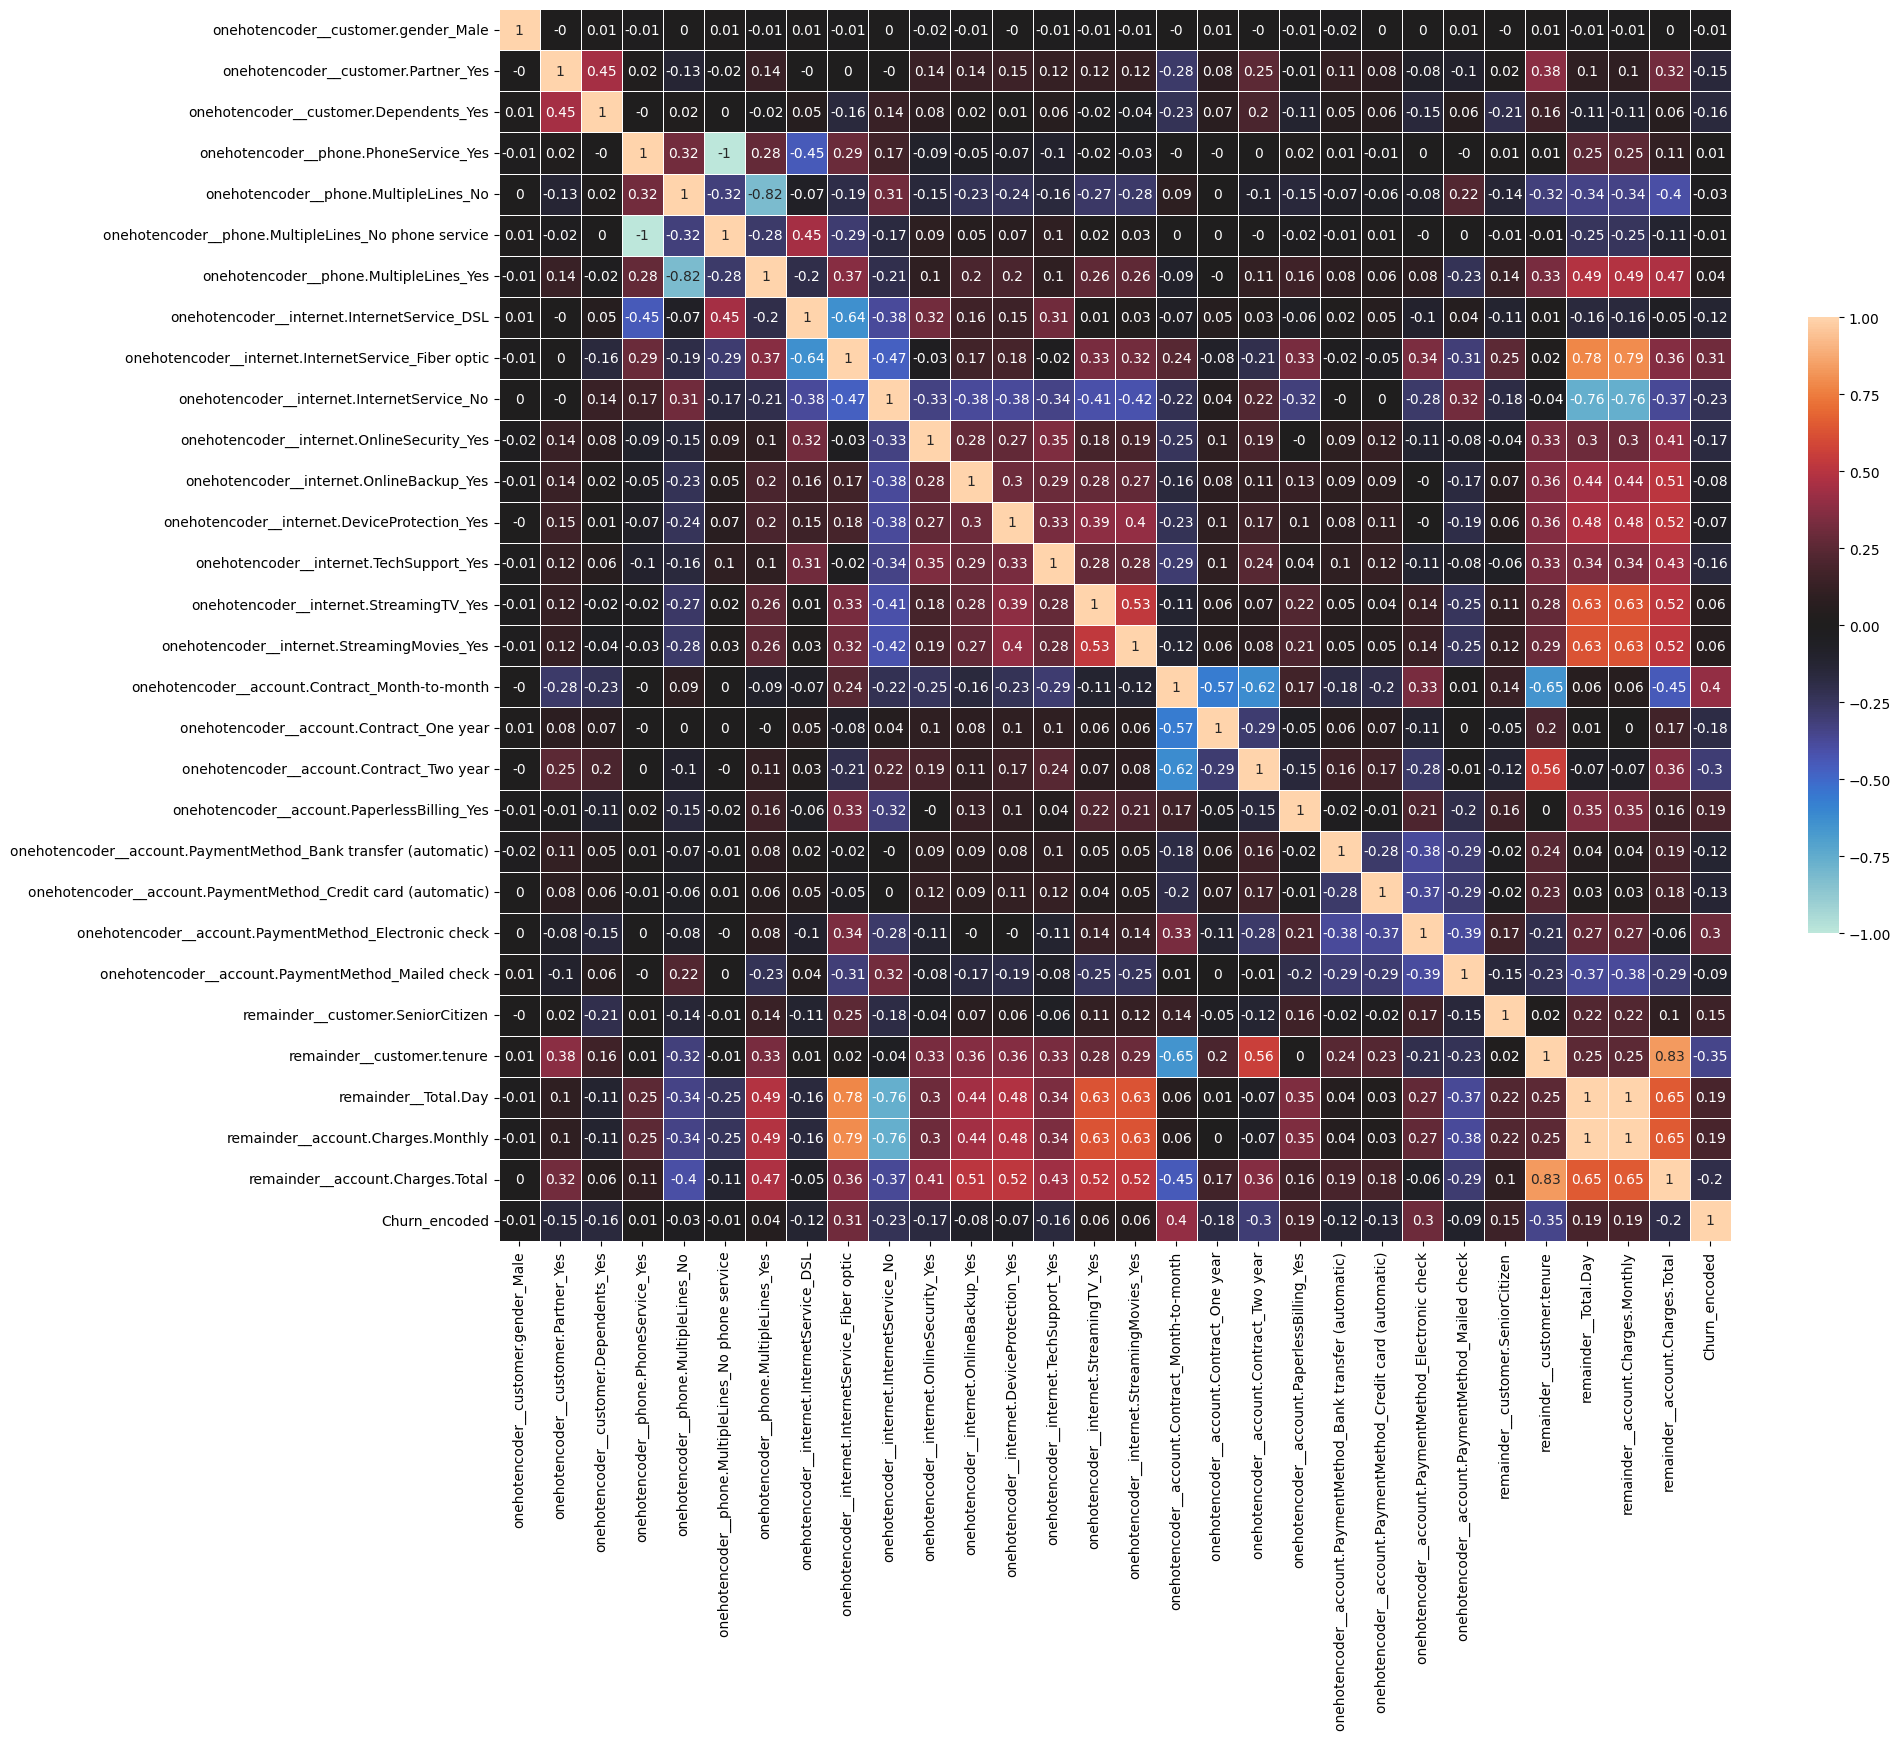

In [56]:
import numpy as np # Import the numpy library

fig, ax = plt.subplots(figsize=(20,16))
ax = sns.heatmap(np.round(correlacao, 2), vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})
plt.show()

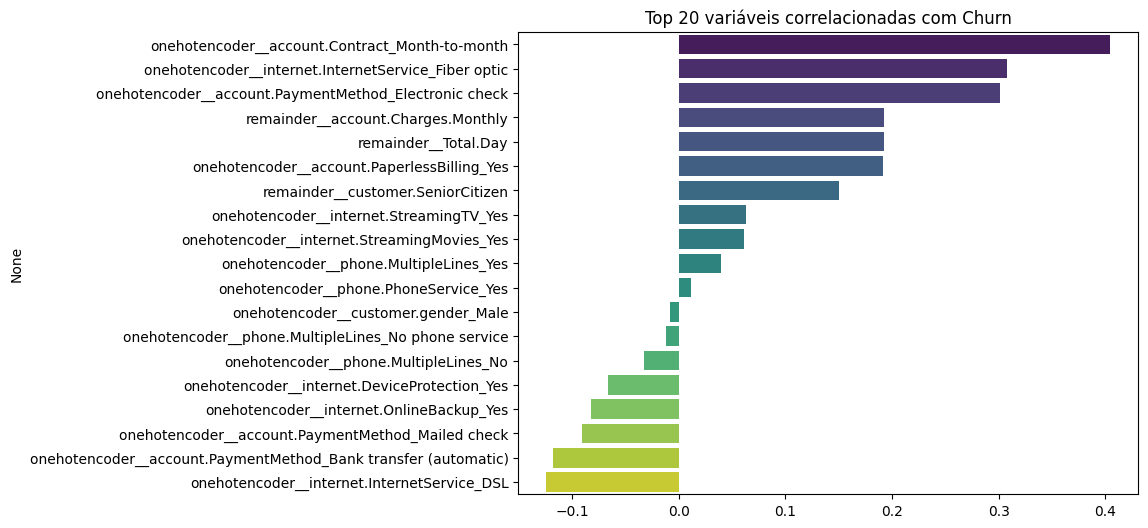

In [60]:
plt.figure(figsize=(8,6))
corr = df_codificado.corr()['Churn_encoded'].sort_values(ascending=False)
sns.barplot(
    x=corr.values[1:20],
    y=corr.index[1:20],
    hue=corr.index[1:20],
    palette="viridis",
    dodge=False,
    legend=False
)
plt.title("Top 20 variáveis correlacionadas com Churn")
plt.show()

Interpretação Ranking top 20 correlações com Churn

| Ranking | Variável                                                       | Correlação com 'Churn\_encoded' | Interpretação                                                                 |
| :------ | :------------------------------------------------------------- | :------------------------------ | :---------------------------------------------------------------------------- |
| 1       | onehotencoder\_\_account.Contract\_Month-to-month             | 0.40                            | Correlação positiva forte. Clientes com contrato Mês a Mês tendem a ter mais Churn. |
| 2       | onehotencoder\_\_internet.InternetService\_Fiber optic         | 0.31                            | Correlação positiva moderada. Clientes com serviço de internet Fibra Óptica tendem a ter mais Churn. |
| 3       | onehotencoder\_\_account.PaymentMethod\_Electronic check       | 0.30                            | Correlação positiva moderada. Clientes que usam Cheque Eletrônico tendem a ter mais Churn. |
| 4       | remainder\_\_account.Charges.Monthly                            | 0.19                            | Correlação positiva fraca. Clientes com maiores cobranças mensais tendem a ter um pouco mais de Churn. |
| 5       | remainder\_\_Total.Day                                         | 0.19                            | Correlação positiva fraca. Clientes com maiores gastos diários tendem a ter um pouco mais de Churn. |
| 6       | onehotencoder\_\_account.PaperlessBilling\_Yes                 | 0.19                            | Correlação positiva fraca. Clientes com cobrança sem papel tendem a ter um pouco mais de Churn. |
| 7       | remainder\_\_customer.SeniorCitizen                            | 0.15                            | Correlação positiva fraca. Clientes idosos tendem a ter um pouco mais de Churn. |
| 8       | onehotencoder\_\_internet.StreamingTV\_Yes                     | 0.06                            | Correlação positiva muito fraca. Pequena tendência de Churn para quem tem Streaming TV. |
| 9       | onehotencoder\_\_internet.StreamingMovies\_Yes                 | 0.06                            | Correlação positiva muito fraca. Pequena tendência de Churn para quem tem Streaming Movies. |
| 10      | onehotencoder\_\_phone.MultipleLines\_Yes                     | 0.04                            | Correlação positiva muito fraca. Pequena tendência de Churn para quem tem Múltiplas Linhas. |
| 11      | onehotencoder\_\_phone.PhoneService\_Yes                      | 0.01                            | Correlação positiva muito fraca. Praticamente sem correlação com ter serviço de telefone. |
| 12      | onehotencoder\_\_customer.gender\_Male                       | -0.01                           | Correlação negativa muito fraca. Praticamente sem correlação com o gênero. |
| 13      | onehotencoder\_\_phone.MultipleLines\_No phone service         | -0.01                           | Correlação negativa muito fraca. Praticamente sem correlação com não ter serviço de telefone. |
| 14      | onehotencoder\_\_phone.MultipleLines\_No                       | -0.03                           | Correlação negativa muito fraca. Praticamente sem correlação com não ter Múltiplas Linhas. |
| 15      | onehotencoder\_\_internet.DeviceProtection\_Yes               | -0.07                           | Correlação negativa fraca. Clientes com Proteção de Dispositivo tendem a ter um pouco menos de Churn. |
| 16      | onehotencoder\_\_internet.OnlineBackup\_Yes                   | -0.08                           | Correlação negativa fraca. Clientes com Backup Online tendem a ter um pouco menos de Churn. |
| 17      | onehotencoder\_\_account.PaymentMethod\_Mailed check         | -0.09                           | Correlação negativa fraca. Clientes que usam Cheque Enviado tendem a ter um pouco menos de Churn. |
| 18      | onehotencoder\_\_account.PaymentMethod\_Bank transfer (auto) | -0.12                           | Correlação negativa fraca. Clientes com Transferência Bancária Automática tendem a ter um pouco menos de Churn. |
| 19      | onehotencoder\_\_internet.InternetService\_DSL                 | -0.12                           | Correlação negativa fraca. Clientes com serviço de internet DSL tendem a ter um pouco menos de Churn. |
| 20      | onehotencoder\_\_account.PaymentMethod\_Credit card (auto)  | -0.13                           | Correlação negativa fraca. Clientes com Cartão de Crédito Automático tendem a ter um pouco menos de Churn. |

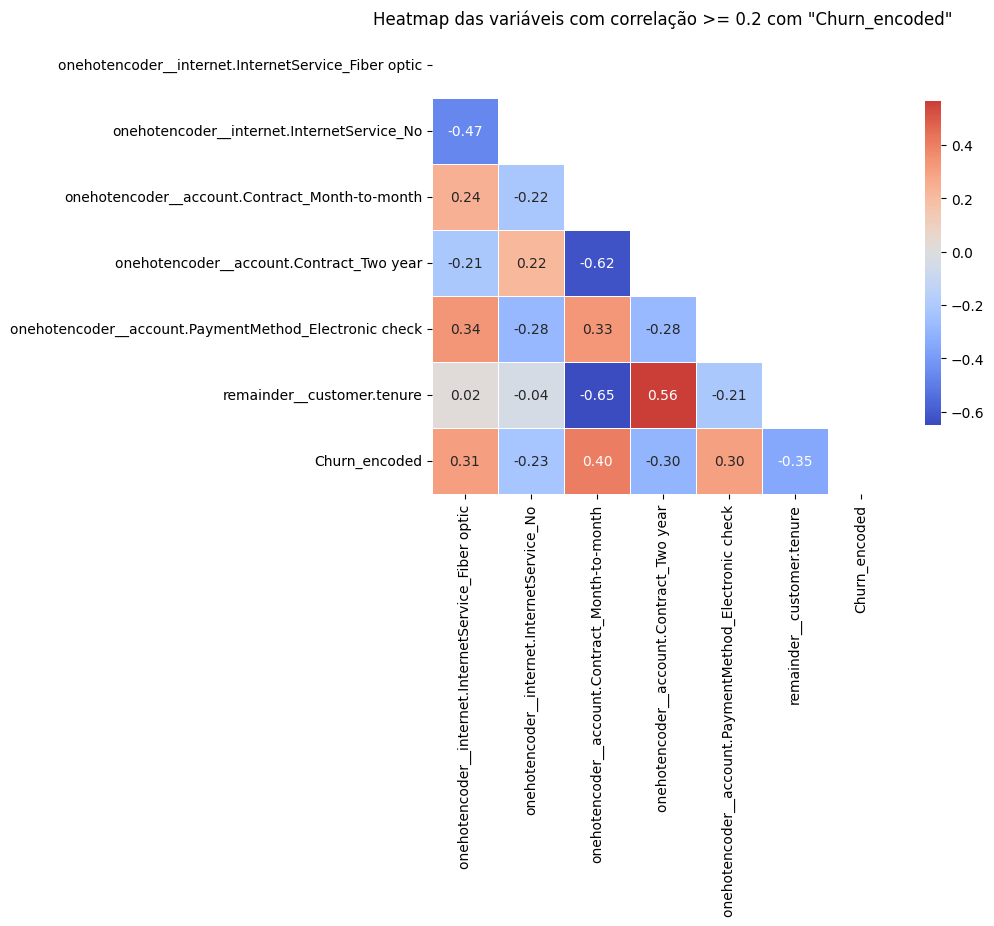

In [64]:
# Definir a variável alvo
target_var = 'Churn_encoded'

# Definir o limiar mínimo de correlação absoluta para seleção
limiar = 0.2

# Filtrar variáveis que tenham correlação absoluta >= limiar com a variável alvo
# Isso cria uma lista com as variáveis relevantes
variaveis_relevantes = correlacao.index[abs(correlacao[target_var]) >= limiar].tolist()

# Garantir que a variável alvo está na lista (se não estiver, adiciona)
if target_var not in variaveis_relevantes:
    variaveis_relevantes.append(target_var)

# Criar uma matriz de correlação somente com as variáveis selecionadas
corr_filtrada = correlacao.loc[variaveis_relevantes, variaveis_relevantes]

# Gerar uma máscara para esconder o triângulo superior da matriz (incluindo diagonal)
mascara = np.triu(np.ones_like(corr_filtrada, dtype=bool))

# Plotar o heatmap com a máscara aplicada para melhor visualização
plt.figure(figsize=(8,6))
sns.heatmap(
    corr_filtrada,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.7},
    mask=mascara
)
plt.title(f'Heatmap das variáveis com correlação >= {limiar} com "{target_var}"')
plt.show()

Interpretação Heatmap, desconsiderando as correlações fracas:

| Variável                                                       | Correlação com 'Churn\_encoded' | Interpretação                                                                 |
| :------------------------------------------------------------- | :------------------------------ | :---------------------------------------------------------------------------- |
| onehotencoder\_\_account.Contract\_Month-to-month             | 0.40                            | Correlação positiva forte. Clientes com contrato Mês a Mês tendem a ter mais Churn. |
| onehotencoder\_\_internet.InternetService\_Fiber optic         | 0.31                            | Correlação positiva moderada. Clientes com serviço de internet Fibra Óptica tendem a ter mais Churn. |
| onehotencoder\_\_account.PaymentMethod\_Electronic check       | 0.30                            | Correlação positiva moderada. Clientes que usam Cheque Eletrônico tendem a ter mais Churn. |
| onehotencoder\_\_internet.InternetService\_No                 | -0.23                           | Correlação negativa moderada. Clientes sem serviço de internet tendem a ter menos Churn. |
| onehotencoder\_\_account.Contract\_Two year                  | -0.30                           | Correlação negativa moderada. Clientes com contrato de Dois Anos tendem a ter menos Churn. |
| remainder\_\_customer.tenure                                   | -0.35                           | Correlação negativa moderada. Clientes com maior tempo de permanência tendem a ter menos Churn. |

APLICAÇÃO MODELOS PREDITIVOS NÃO LINEARES

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
x, x_teste, y, y_teste = train_test_split(x, y, test_size=0.15, stratify= y, random_state=42)
x_treino, x_val, y_treino, y_val = train_test_split(x, y, stratify= y, random_state=42)

PRIMEIRO MODELO: ARVORE DE DECISÃO

In [67]:
from sklearn.tree import DecisionTreeClassifier

APLICAÇÃO DE MODELO ÁRVORE DE DECISÃO SIMPLICADO PARA ANALISE "PONTO DE PODA"

In [68]:
modelo = DecisionTreeClassifier()
modelo.fit(x_treino, y_treino)
print(f'Acurácia treino: {modelo.score(x_treino, y_treino):.2f}')
print(f'Acurácia validação: {modelo.score(x_val, y_val):.2f}')

Acurácia treino: 1.00
Acurácia validação: 0.74


In [69]:
from sklearn.tree import plot_tree

AVALIAÇÃO VISUAL DAS DECISÕESDO MODELO ÁRVORE SIMPLICADO PARA DETERMINAR "PONDO DE PODA"

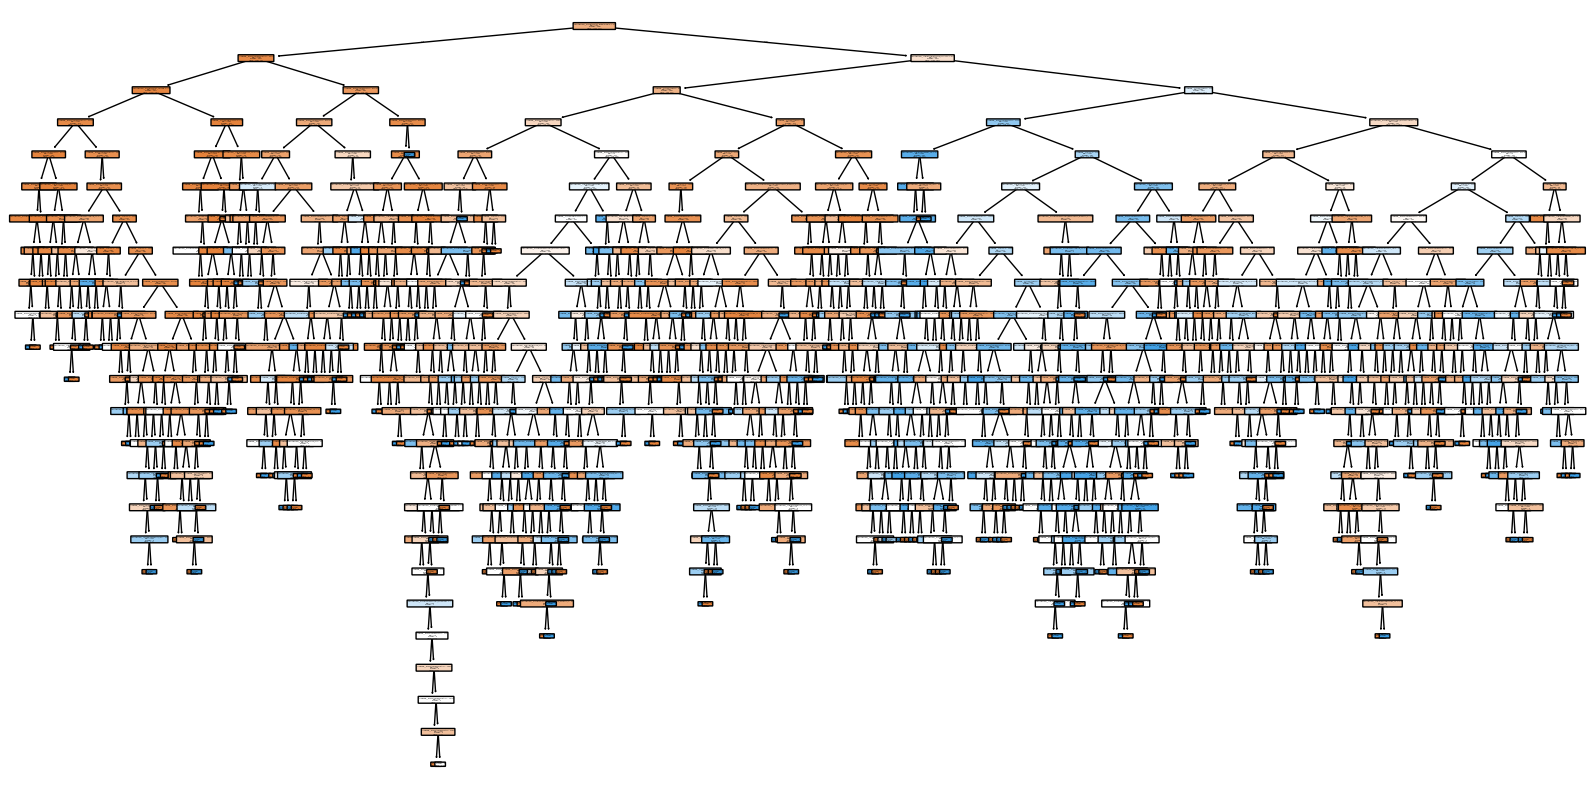

In [70]:
plt.figure(figsize=(20,10))
plot_tree(modelo, feature_names=x_df.columns, filled=True, rounded=True);

AVALIAÇÃO  MÉTODO DE BALANCEAMENTO QUE SERÁ ESCOLHIDO PARA MODELO ÁRVORE

In [73]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.under_sampling import NearMiss

In [85]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

In [74]:
modelo_arvore_skf_UnderSample = DecisionTreeClassifier(max_depth = 5)
pipeline = imbpipeline([('undersample', NearMiss(version = 3)), ('arvore', modelo_arvore_skf_UnderSample)])
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 5)
cv_resultados_UnderSample = cross_validate(pipeline, x, y, cv = skf, scoring = 'recall')
cv_resultados_UnderSample

{'fit_time': array([0.06941438, 0.06373167, 0.05870223, 0.0599463 , 0.05751491]),
 'score_time': array([0.00412679, 0.00413227, 0.00566411, 0.00515556, 0.00377727]),
 'test_score': array([0.68867925, 0.7672956 , 0.74132492, 0.70125786, 0.60062893])}

In [75]:
media_recall = cv_resultados_UnderSample['test_score'].mean()
desvio_padrao = cv_resultados_UnderSample['test_score'].std()
print(f'Acurácia média: {media_recall:.2f}')
print(f'Desvio padrão: {desvio_padrao:.2f}')
print(f'Intervalo de confiança: [{media_recall - 2*desvio_padrao}, {min(media_recall + 2*desvio_padrao, 1)}]')

Acurácia média: 0.70
Desvio padrão: 0.06
Intervalo de confiança: [0.5858525217482449, 0.813822100794064]


In [84]:
pipeline.fit(x_treino, y_treino)
y_previsto = pipeline.predict(x_val)

In [86]:
matriz_confusao = confusion_matrix(y_val, y_previsto)
print(matriz_confusao)

[[904 194]
 [130 267]]


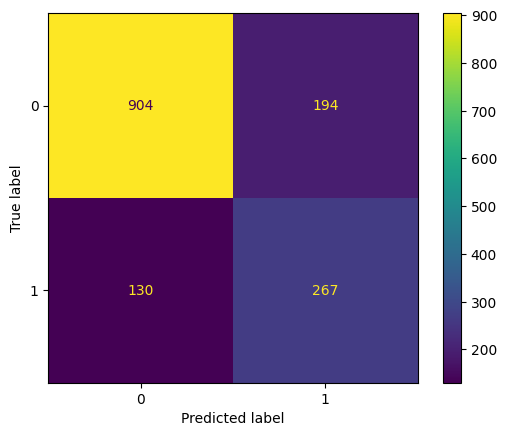

In [87]:
visualizacao = ConfusionMatrixDisplay(confusion_matrix=matriz_confusao, display_labels=label_encoder.classes_)
visualizacao.plot();
plt.show()

In [88]:
print(classification_report(y_val, y_previsto))

              precision    recall  f1-score   support

           0       0.87      0.82      0.85      1098
           1       0.58      0.67      0.62       397

    accuracy                           0.78      1495
   macro avg       0.73      0.75      0.74      1495
weighted avg       0.80      0.78      0.79      1495



In [76]:
from imblearn.over_sampling import SMOTE

In [77]:
oversample = SMOTE()
x_balanceado, y_balanceado = oversample.fit_resample(x, y)

In [78]:
porpoçao_y = pd.Series(y_balanceado).value_counts(normalize = True)
print(porpoçao_y)

0    0.5
1    0.5
Name: proportion, dtype: float64


In [79]:
modelo_arvore_skf_OverSample = DecisionTreeClassifier(max_depth = 5)
pipeline = imbpipeline([('oversample', SMOTE()), ('arvore', modelo_arvore_skf_OverSample)])
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 5)
cv_resultados_OverSample = cross_validate(pipeline, x, y, cv = skf, scoring = 'recall')
cv_resultados_OverSample

{'fit_time': array([0.0883956 , 0.07037306, 0.06751084, 0.06931114, 0.06886292]),
 'score_time': array([0.00655222, 0.00550795, 0.00550485, 0.00545979, 0.0057919 ]),
 'test_score': array([0.63207547, 0.66666667, 0.64353312, 0.51257862, 0.49056604])}

In [81]:
media_recall = cv_resultados_OverSample['test_score'].mean()
desvio_padrao = cv_resultados_OverSample['test_score'].std()
print(f'Acurácia média: {media_recall:.2f}')
print(f'Desvio padrão: {desvio_padrao:.2f}')
print(f'Intervalo de confiança: [{media_recall - 2*desvio_padrao}, {min(media_recall + 2*desvio_padrao, 1)}]')

Acurácia média: 0.59
Desvio padrão: 0.07
Intervalo de confiança: [0.4437817975098801, 0.7343861686826083]


In [89]:
pipeline.fit(x_treino, y_treino)
y_previsto = pipeline.predict(x_val)

In [90]:
matriz_confusao = confusion_matrix(y_val, y_previsto)
print(matriz_confusao)

[[920 178]
 [156 241]]


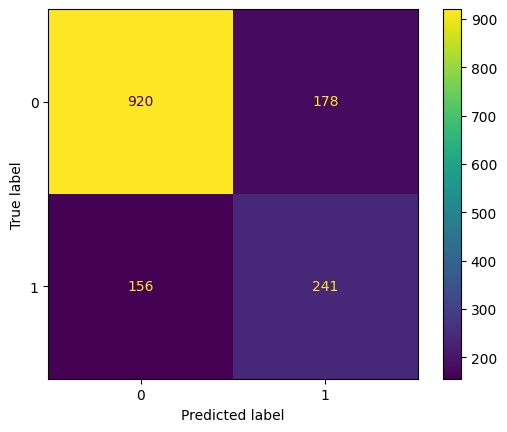

In [91]:
visualizacao = ConfusionMatrixDisplay(confusion_matrix=matriz_confusao, display_labels=label_encoder.classes_)
visualizacao.plot();
plt.show()

In [92]:
print(classification_report(y_val, y_previsto))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1098
           1       0.58      0.61      0.59       397

    accuracy                           0.78      1495
   macro avg       0.72      0.72      0.72      1495
weighted avg       0.78      0.78      0.78      1495



RESULTADO DA AVALIAÇÃO DE MÉTODO DE BALANCEAMENTO PARA O MODELO ARVORE

Primeiramente para que essa avaliação seja possível é necessário determinar a variável entre precisão e recall é mais relevante para prevença de Churn de clientes.

Na avaliação de qual metodo de balanceamento deve ser utilizado, foi priorizada a métrica Recall pois é mais abragente, e o custo de falsos positivos preliminarmente é menor do que a perda de clientes.Dessa forma o medoto NearMiss (undersample) se sobresaiu.

APLICAÇÃO DO MODELO ÁRVORE COM MÉTODO NearMiss EM PARTIÇÃO NÃO BALANCEADA PARA AVALIAR CAPACIDADE DE GENERALIZAÇÃO

              precision    recall  f1-score   support

           0       0.87      0.74      0.80       775
           1       0.49      0.69      0.57       280

    accuracy                           0.73      1055
   macro avg       0.68      0.71      0.69      1055
weighted avg       0.77      0.73      0.74      1055



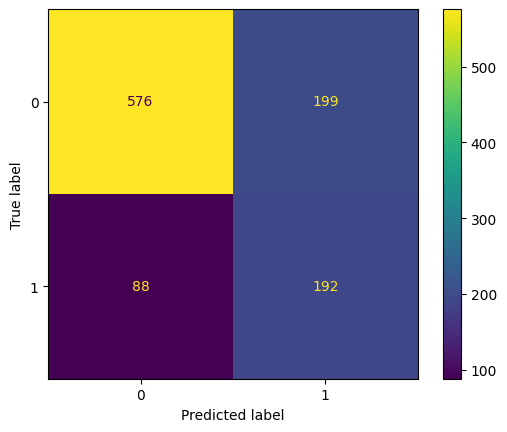

In [93]:
undersample = NearMiss(version = 3)
x_balanceado, y_balanceado = undersample.fit_resample(x, y)

modelo_arvore_final = DecisionTreeClassifier(max_depth = 5)
modelo_arvore_final.fit(x_balanceado, y_balanceado)
y_previsto = modelo_arvore_final.predict(x_teste)

print(classification_report(y_teste, y_previsto))
ConfusionMatrixDisplay.from_predictions(y_teste, y_previsto);

modelo_arvore_final apresentou consistência nos resultados ao generalizar com novos dados.

APLICAÇÃO DE MODELO RANDOM FOREST PARA COMPARAÇÃO COM MODELO DE ÁRVORE DE DECISÃO

In [94]:
from sklearn.ensemble import RandomForestClassifier

              precision    recall  f1-score   support

           0       0.87      0.78      0.82       775
           1       0.53      0.68      0.59       280

    accuracy                           0.75      1055
   macro avg       0.70      0.73      0.71      1055
weighted avg       0.78      0.75      0.76      1055



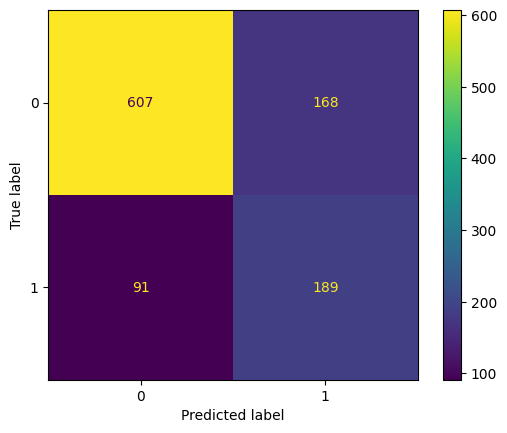

In [95]:
undersample = NearMiss(version = 3)
x_balanceado, y_balanceado = undersample.fit_resample(x, y)

modelo_rf = RandomForestClassifier(max_depth=10, random_state=42)
modelo_rf.fit(x_balanceado, y_balanceado)
y_previsto = modelo_rf.predict(x_teste)

print(classification_report(y_teste, y_previsto))
ConfusionMatrixDisplay.from_predictions(y_teste, y_previsto);


CONCLUSÃO SOBRE QUAL MODELO DE PREDIÇÃO UTILIZAR

Ambos os modelos são capazes de prever a evasão de clientes, tendo alta proximidade na métrica Recall.

RELATÓRIO

### Resumo da Preparação dos Dados

As seguintes etapas foram realizadas para preparar os dados para a modelagem preditiva:

1.  **Carregamento dos Dados**: Os dados foram carregados a partir do arquivo `df_limpo.csv` em um DataFrame pandas.
2.  **Remoção de Coluna Irrelevante**: A coluna `customerID` foi removida por ser um identificador único e não relevante para a previsão de Churn.
3.  **Tratamento de Valores Ausentes**: As linhas com valores ausentes nas colunas `Total.Day` e `account.Charges.Total` foram removidas do DataFrame.
4.  **Padronização de Valores Categóricos**: Em colunas com três parâmetros, onde um dos valores era "No internet service", este foi agrupado com "No" para reduzir a cardinalidade e simplificar a codificação.
5.  **Codificação de Variáveis**:
    *   As variáveis explicativas (features) categóricas foram codificadas usando **OneHotEncoder** com `make_column_transformer`, aplicando a técnica de "dummy trap" (`drop='if_binary'`) para colunas binárias e mantendo as colunas numéricas (`remainder='passthrough'`).
    *   A variável alvo (`Churn`) foi codificada em valores numéricos (0 e 1) usando **LabelEncoder**.
6.  **Criação do DataFrame Codificado**: As features codificadas e a variável alvo codificada foram combinadas em um novo DataFrame (`df_codificado`) para uso na modelagem.


### Principais Fatores que Contribuem para o Churn de Clientes

Com base na análise de correlação com a variável alvo 'Churn\_encoded', os seguintes fatores demonstraram maior influência na probabilidade de um cliente evadir:

**Fatores com Correlação Positiva (aumentam a probabilidade de Churn):**

*   **Contrato Mês a Mês (`onehotencoder__account.Contract_Month-to-month`):** Esta variável apresentou a correlação positiva mais forte (0.40). Clientes com contratos de curto prazo (mês a mês) têm uma probabilidade significativamente maior de Churn em comparação com clientes com contratos de longo prazo.
*   **Serviço de Internet Fibra Óptica (`onehotencoder__internet.InternetService_Fiber optic`):** Clientes que utilizam o serviço de internet Fibra Óptica também mostram uma correlação positiva moderada (0.31) com o Churn. Isso pode estar relacionado a problemas de qualidade do serviço, custo ou expectativas não atendidas associadas a essa tecnologia.
*   **Método de Pagamento Cheque Eletrônico (`onehotencoder__account.PaymentMethod_Electronic check`):** O uso de cheque eletrônico como método de pagamento tem uma correlação positiva moderada (0.30) com o Churn. Pode haver insatisfação com este método ou estar associado a um perfil de cliente mais propenso a cancelar.
*   **Outros fatores com correlação positiva, mas de menor magnitude:** Cobranças Mensais, Gastos Diários e Cobrança sem Papel (`account.PaperlessBilling_Yes`) também apresentaram correlações positivas, indicando uma leve tendência de aumento do Churn com valores mais altos ou a presença dessas características.

**Fatores com Correlação Negativa (diminuem a probabilidade de Churn):**

*   **Tempo de Permanência (`remainder__customer.tenure`):** Esta variável tem a correlação negativa mais forte (-0.35). Clientes com maior tempo de permanência na empresa são significativamente menos propensos a evadir. A lealdade do cliente aumenta com o tempo.
*   **Contrato de Dois Anos (`onehotencoder__account.Contract_Two year`):** Clientes com contratos de dois anos apresentam uma correlação negativa moderada (-0.30) com o Churn. Contratos de longo prazo demonstram um maior compromisso do cliente e menor probabilidade de evasão.
*   **Ausência de Serviço de Internet (`onehotencoder__internet.InternetService_No`):** Clientes que não utilizam o serviço de internet têm uma correlação negativa moderada (-0.23) com o Churn. Isso pode indicar que a insatisfação com os serviços de internet é um motor significativo de Churn. Clientes que só usam o serviço de telefone tendem a ficar mais.

Estes são os principais fatores identificados através da análise de correlação. É importante notar que a correlação não implica causalidade, mas indica uma associação entre as variáveis e a probabilidade de Churn. Estes insights são cruciais para direcionar as estratégias de retenção.

### Estratégias de Retenção de Clientes

Com base nos principais fatores que contribuem para o Churn, as seguintes estratégias de retenção são propostas:

1.  **Incentivar Contratos de Longo Prazo:** Dado que clientes com contratos Mês a Mês têm uma propensão significativamente maior ao Churn, a empresa deve focar em converter esses clientes para contratos de Um Ano ou Dois Anos. Isso pode ser feito oferecendo descontos atrativos na mensalidade para contratos mais longos, benefícios adicionais (como upgrades de serviço gratuitos ou equipamentos com desconto) ou programas de fidelidade que recompensem a permanência. Destacar a estabilidade e o custo-benefício dos contratos de longo prazo nas comunicações com o cliente.

2.  **Melhorar a Qualidade e a Percepção do Serviço de Fibra Óptica:** A correlação positiva com o serviço de Fibra Óptica sugere que pode haver problemas de qualidade, suporte ou expectativas não atendidas associadas a este serviço. A empresa deve investigar as causas dessa insatisfação (por exemplo, através de pesquisas de satisfação, análise de reclamações) e implementar melhorias. Comunicar ativamente as melhorias realizadas e os benefícios da Fibra Óptica, garantindo que o suporte técnico seja ágil e eficaz para esses clientes.

3.  **Avaliar e Otimizar o Método de Pagamento Cheque Eletrônico:** A associação entre o uso de Cheque Eletrônico e o Churn indica uma possível insatisfação com este método de pagamento. A empresa deve investigar se há problemas no processo de pagamento, taxas inesperadas ou falta de conveniência. Considerar incentivar a migração para outros métodos de pagamento com menor correlação com o Churn (como transferência bancária automática ou cartão de crédito automático), oferecendo pequenas recompensas ou simplificando o processo de mudança.

4.  **Desenvolver Programas de Fidelidade e Engajamento para Clientes de Longa Data e Novos Clientes:** O tempo de permanência é um forte fator de retenção. Para clientes de longa data, criar programas de fidelidade que ofereçam reconhecimento, benefícios exclusivos (como suporte prioritário, ofertas especiais) e comunicação personalizada para reforçar seu valor. Para novos clientes, focar em um processo de integração suave ("onboarding"), garantindo que eles compreendam totalmente os serviços e benefícios, e realizar acompanhamento proativo nos primeiros meses para resolver quaisquer problemas iniciais e construir um relacionamento.

Estas estratégias visam abordar os principais direcionadores de Churn identificados na análise, focando em transformar os fatores de risco em pontos fortes de retenção.

### RESUMO VERSÕES BIBLIOTECAS UTILIZADAS

| Biblioteca   | Versão                                          | Observação                                           |
| :----------- | :---------------------------------------------- | :--------------------------------------------------- |
| pandas       | 2.2.2                                           |                                                      |
| seaborn      | 0.13.2                                          |                                                      |
| matplotlib   | 3.10.0                                          |                                                      |
| sklearn      | Não encontrada                                  | Verifique se foi instalada e importada corretamente. |
| imblearn     | Não encontrada                                  | Verifique se foi instalada e importada corretamente. |
| numpy        | 2.0.2                                           |                                                      |
| **Python**   | 3.11.13 (main, Jun 4 2025, 08:57:29) [GCC 11.4.0] |                                                      |